<a href="https://colab.research.google.com/github/AC20UCS066/ultralytics/blob/main/YOLOV8custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Train YOLOv8 Object Detection on a Custom Dataset

 The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks.


## Steps:

- Install YOLOv8
- CLI Basics
- Roboflow
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model


 We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Aug 18 18:03:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
# Git clone method (for development)
%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 117MB/s] 


## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.





In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X8dOpA6pB8Zh2GYt6yCM")
project = rf.workspace("madhu-bzqtw").project("dataset-mizpx")
version = project.version(4)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dataset-4 in yolov8:: 100%|██████████| 812/812 [00:00<00:00, 5926.03it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=15 imgsz=400 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 197MB/s]
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Dataset-4/data.yaml, epochs=15, patience=50, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png        val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv        val_batch0_pred.jpg
confusion_matrix.png				    results.png        val_batch1_labels.jpg
events.out.tfevents.1724004343.8385be13d529.1063.0  train_batch0.jpg   val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg   val_batch2_pred.jpg
labels.jpg					    train_batch90.jpg  weights
P_curve.png					    train_batch91.jpg
PR_curve.png					    train_batch92.jpg


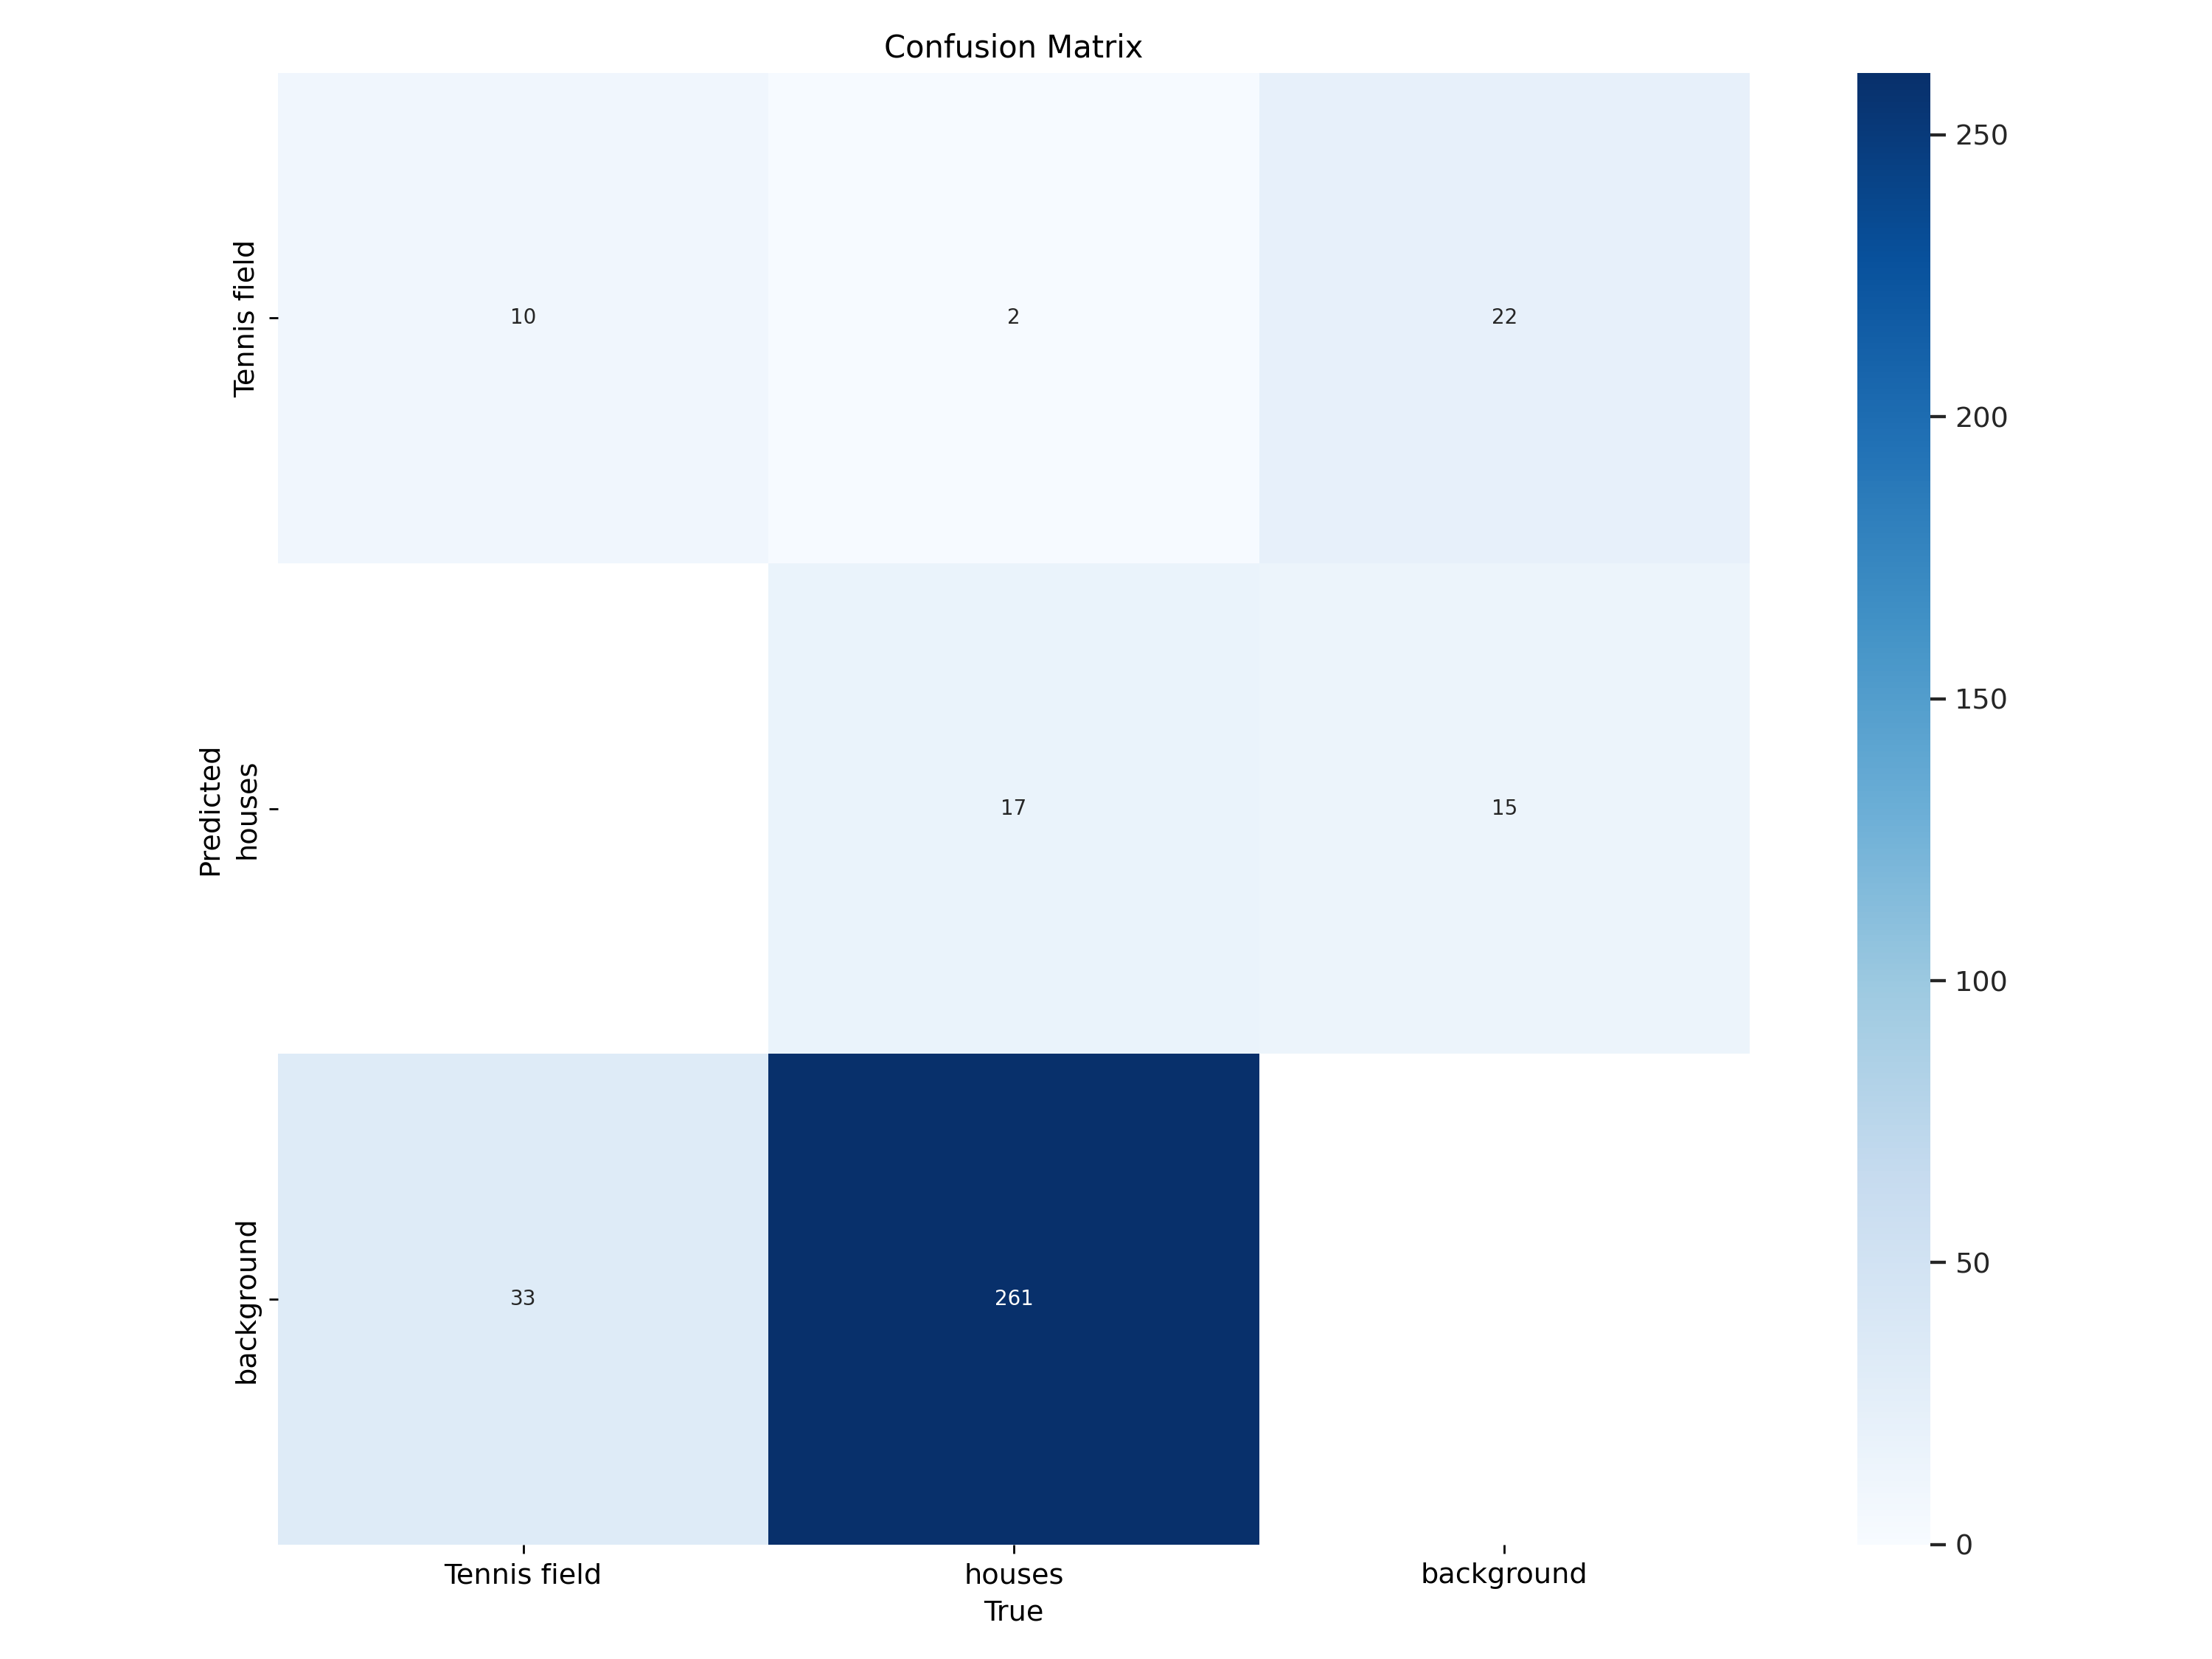

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=400)


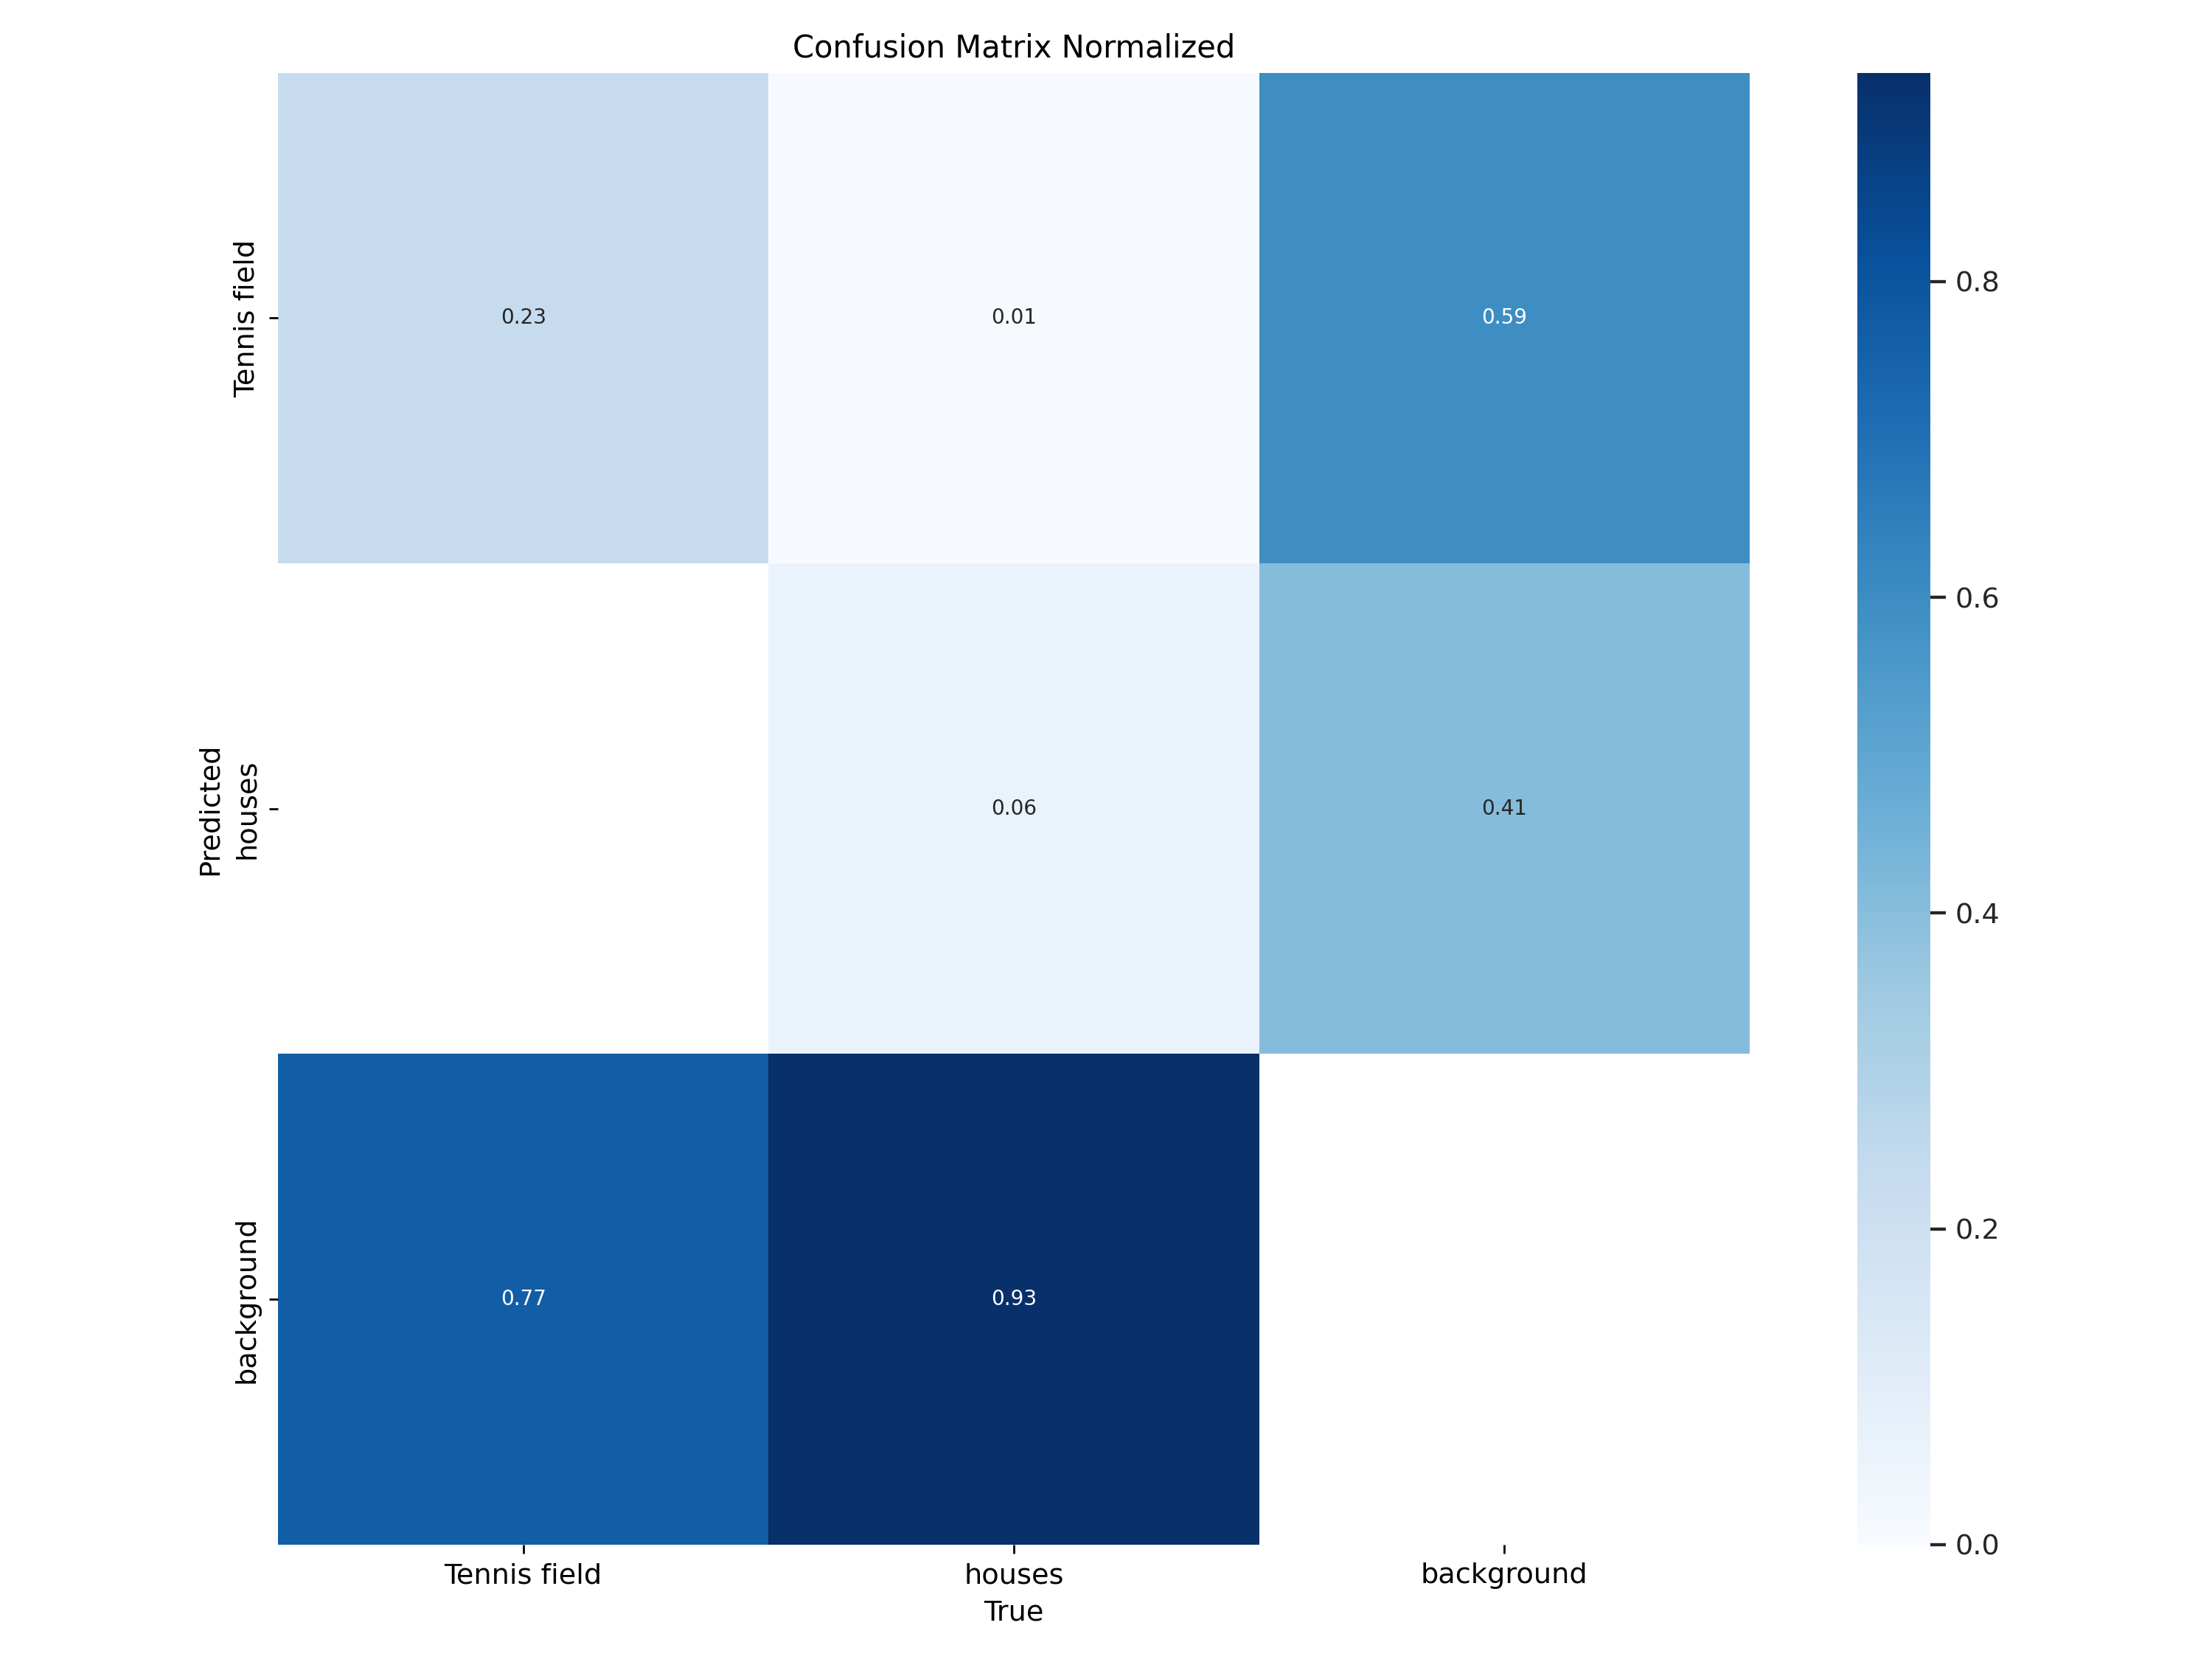

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix_normalized.png', width=400)

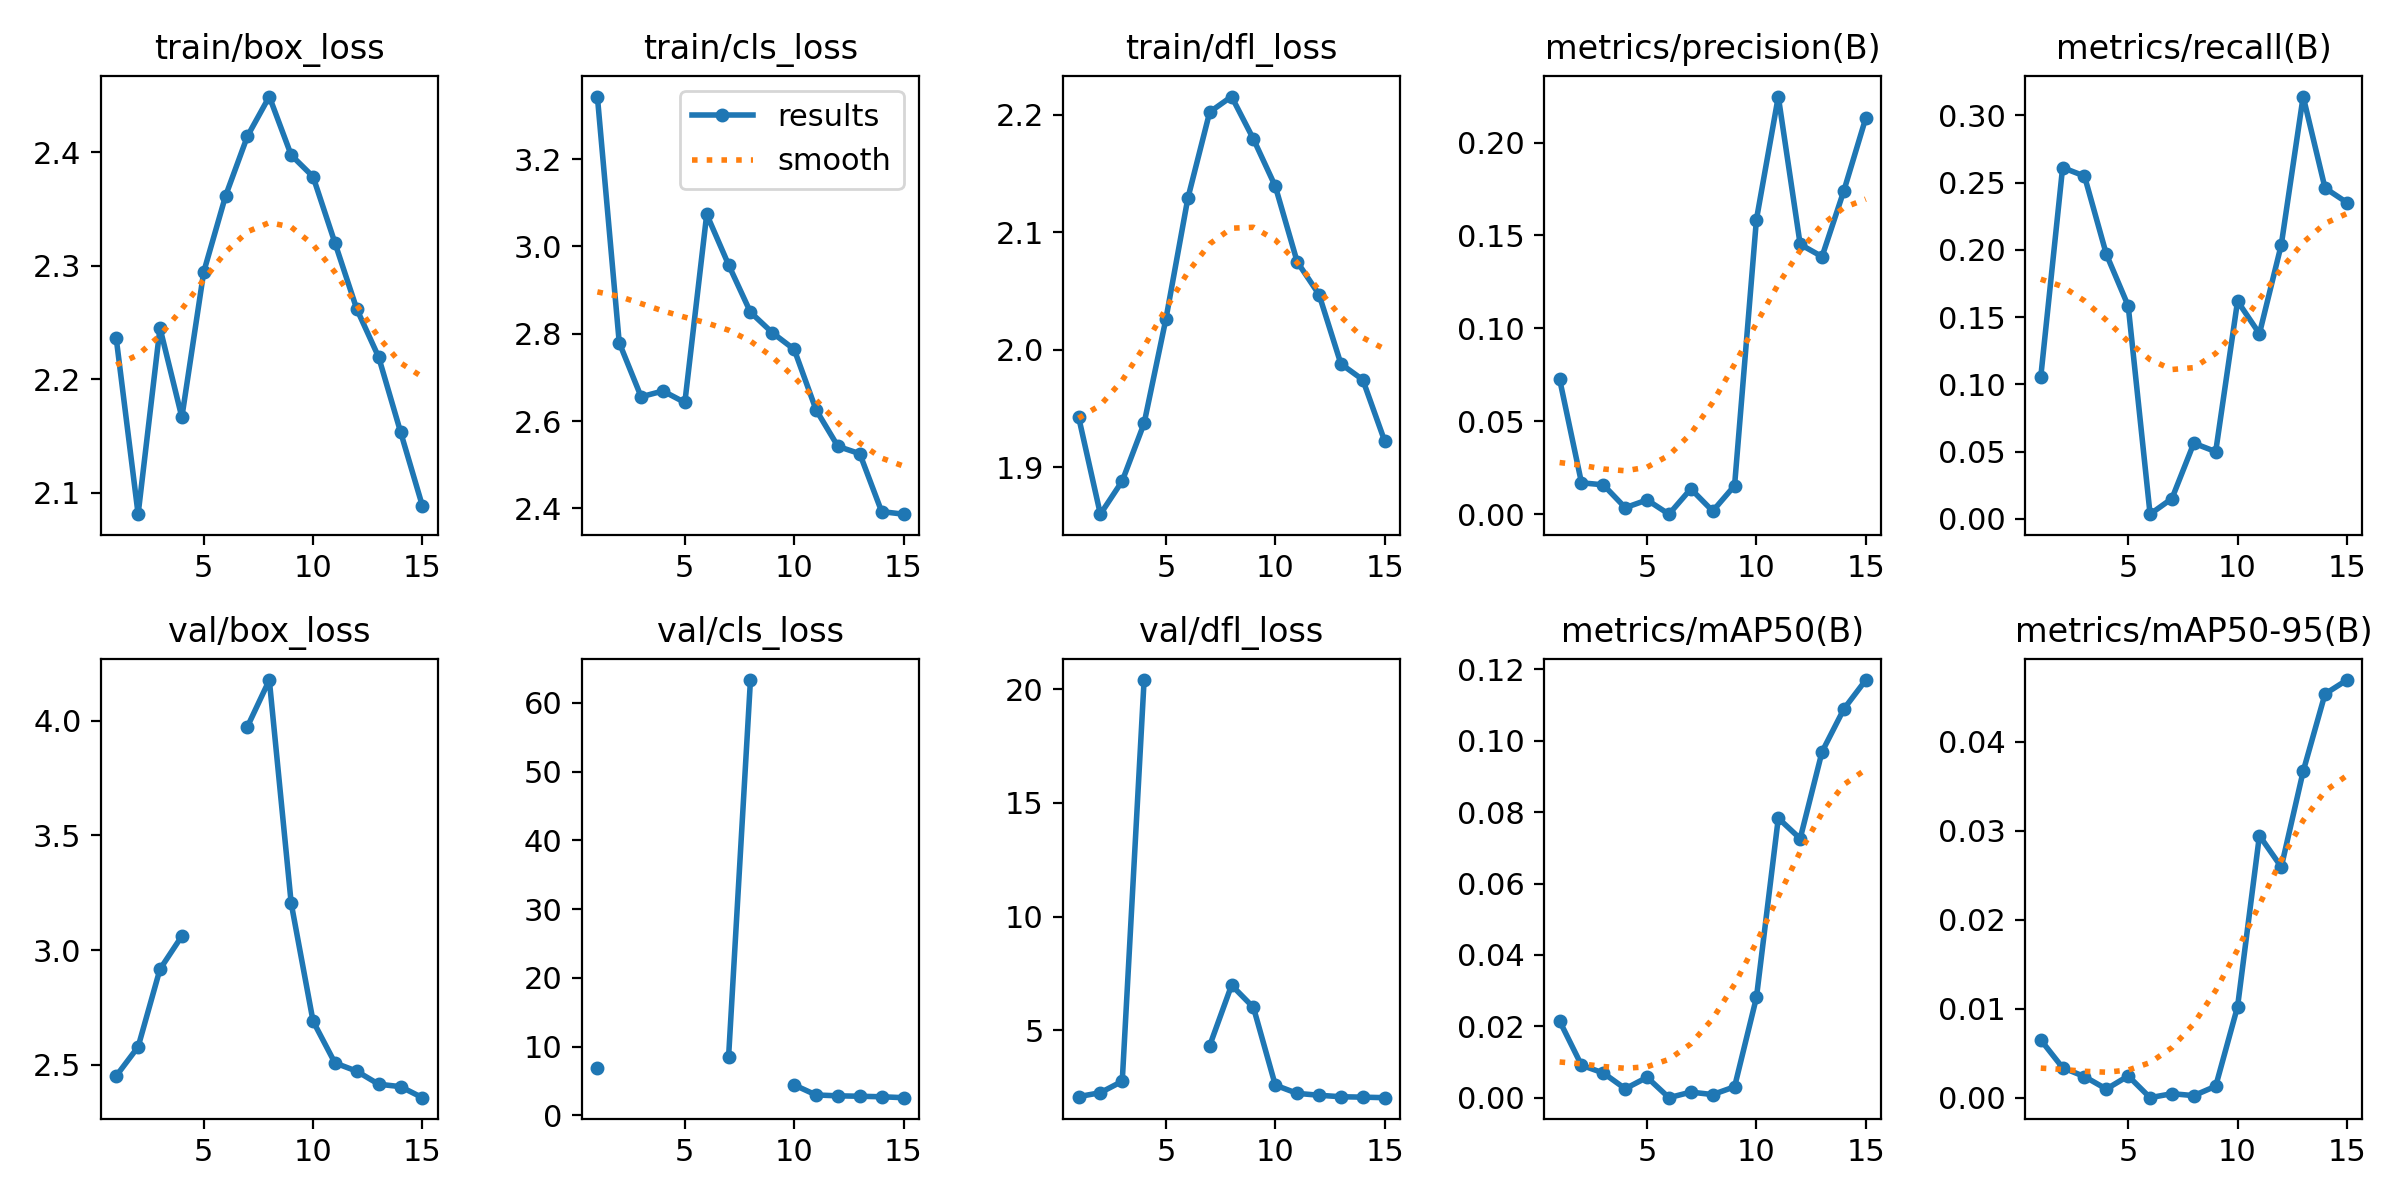

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=400)

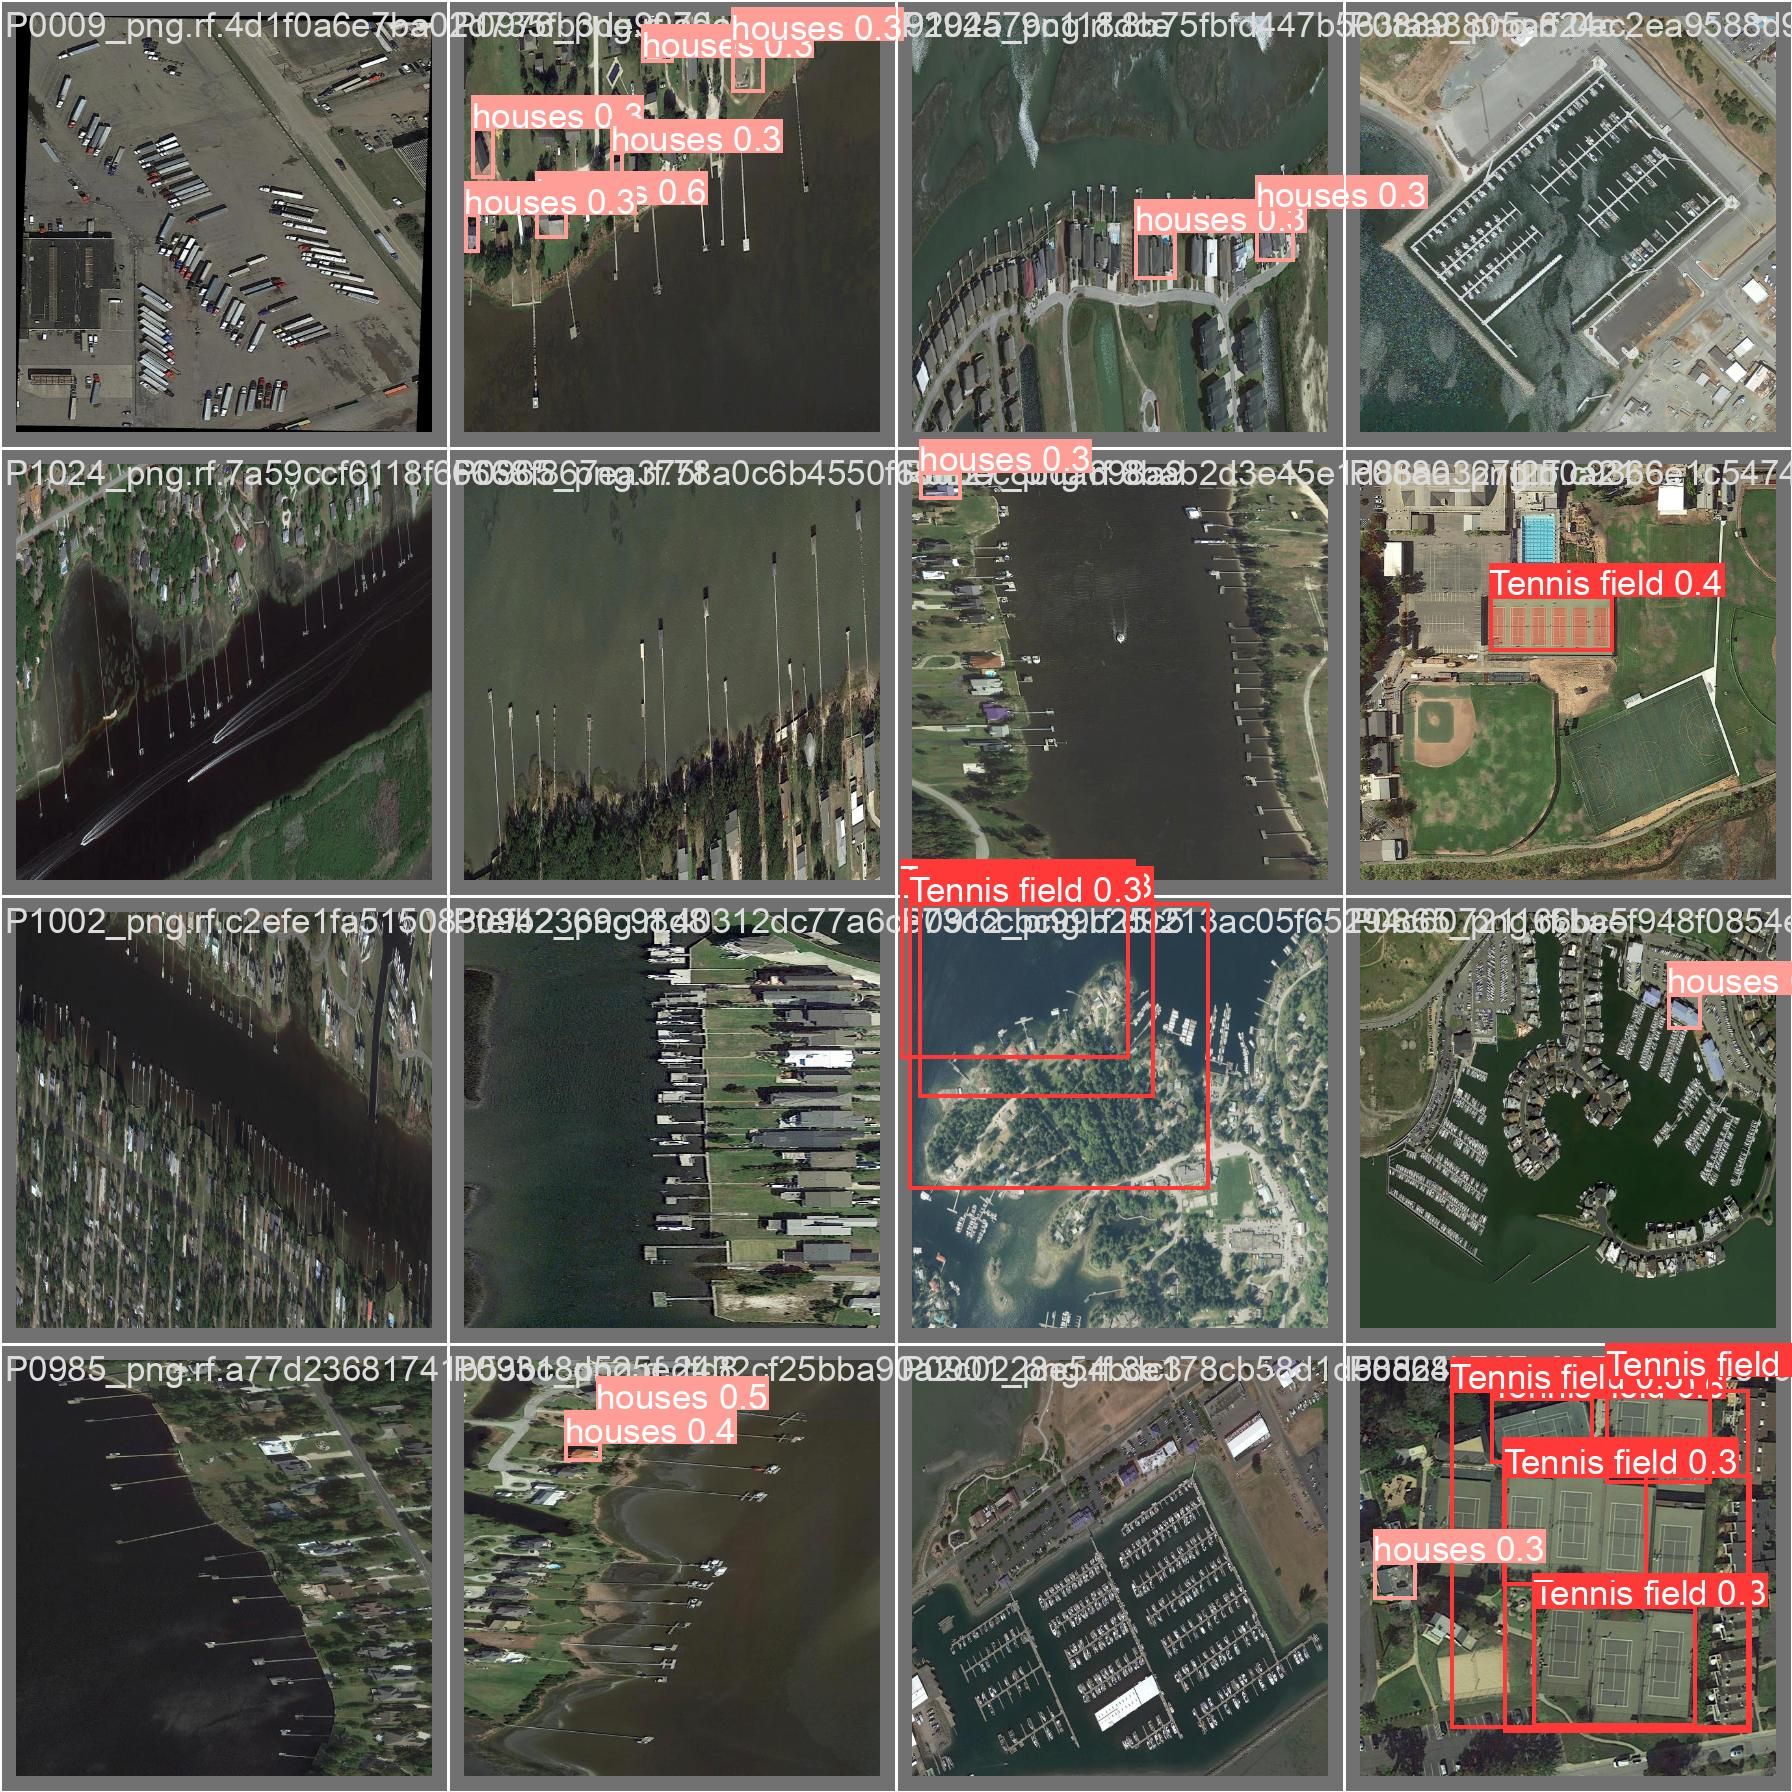

In [ ]:
Image(filename= '/content/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val  model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Dataset-4/valid/labels.cache... 80 images, 17 backgrounds, 0 corrupt: 100% 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.05s/it]
                   all         80        323      0.213      0.235      0.117     0.0468
          Tennis field         80         43      0.122      0.349      0.128      0.051
                houses         80        280      0.305      0.121      0.106     0.0426
Speed: 3.3ms preprocess, 13.9ms inference, 0.0ms loss, 17.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/40 /content/datasets/Dataset-4/test/images/P0073_png.rf.754829f50e6285bfe4d929ac94296956.jpg: 416x416 (no detections), 22.3ms
image 2/40 /content/datasets/Dataset-4/test/images/P0077_png.rf.26c5f2d96e8201a1312eb2f16effdf72.jpg: 416x416 (no detections), 22.3ms
image 3/40 /content/datasets/Dataset-4/test/images/P0090_png.rf.05c0cf2cf8fa8e6b132ca9dc082c3b0f.jpg: 416x416 (no detections), 22.3ms
image 4/40 /content/datasets/Dataset-4/test/images/P0092_png.rf.9bc1428315586f4eca4affb31b041ee4.jpg: 416x416 (no detections), 22.3ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 5/40 /content/datasets/Dataset-4/test/images/P0154_png.rf.34aa213f43ad04c7726f7ac47af11daa.jpg: 416x416 1 Tennis field, 22.3ms
image 6/40 /content/datasets/Dataset-4/test/images/P0195_png.rf.a96692eec95bb2b0ad426c18f87cf58e.jpg: 416x416 

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


**NOTE:** Let's take a look at few results.

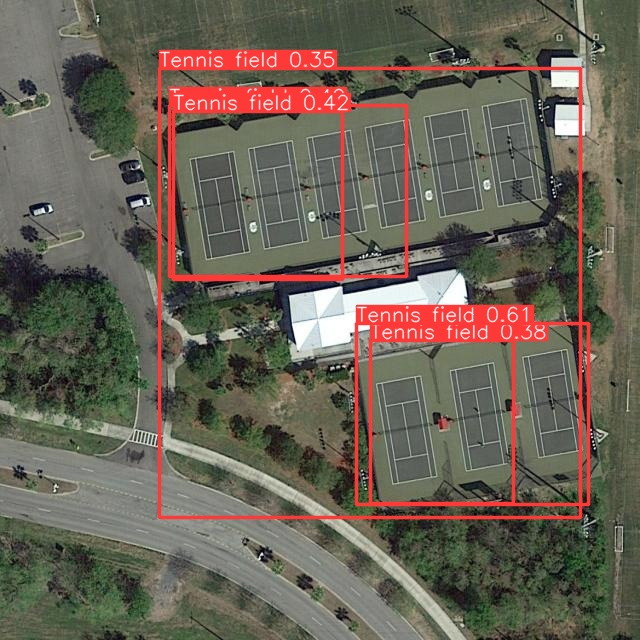

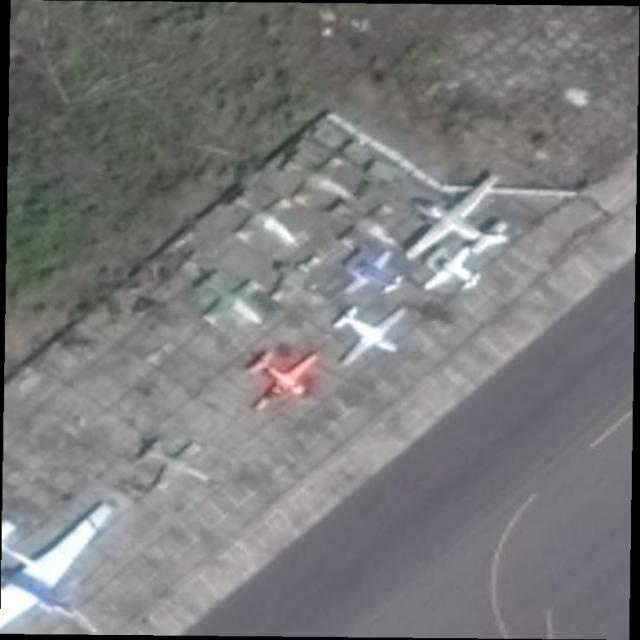

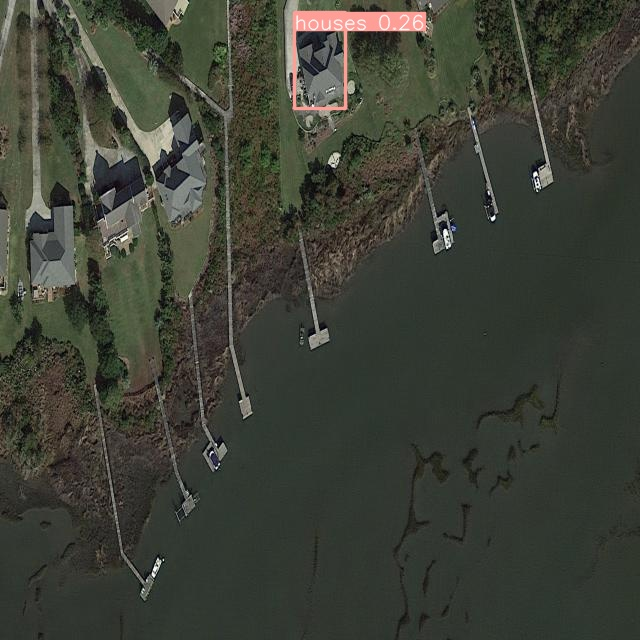

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# prompt: code to save the above model

!cp {HOME}/runs/detect/train/weights/best.pt {HOME}/best.pt
